This is an exploratory data analysis (EDA) notebook on a lung cancer dataset that contains different features/attributes that could help find insights to why some people are diagnosed with lung cancer, what may have led to getting the cancer, symptoms, trends across ages, gender, etc.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer_data = pd.read_csv("dataset.csv")
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
cancer_data.shape

(3000, 16)

The dataset contains 3000 rows and 16 columns.

In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

This dataset contains only two object features namely 'GENDER' and 'LUNG_CANCER'. rest of 14 features are integer data types. Also this dataset contains no null(missing) value.

In [6]:
# Changing categorical feature datatypes.
cancer_data['LUNG_CANCER'] = cancer_data['LUNG_CANCER'].factorize(['NO','YES'])[0]
cancer_data['GENDER'] = cancer_data['GENDER'].factorize(['NO','YES'])[0]
cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


Female = 0; Male = 1

No = 0; Yes = 1

C:\Users\supri\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 2000x2000 with 0 Axes>

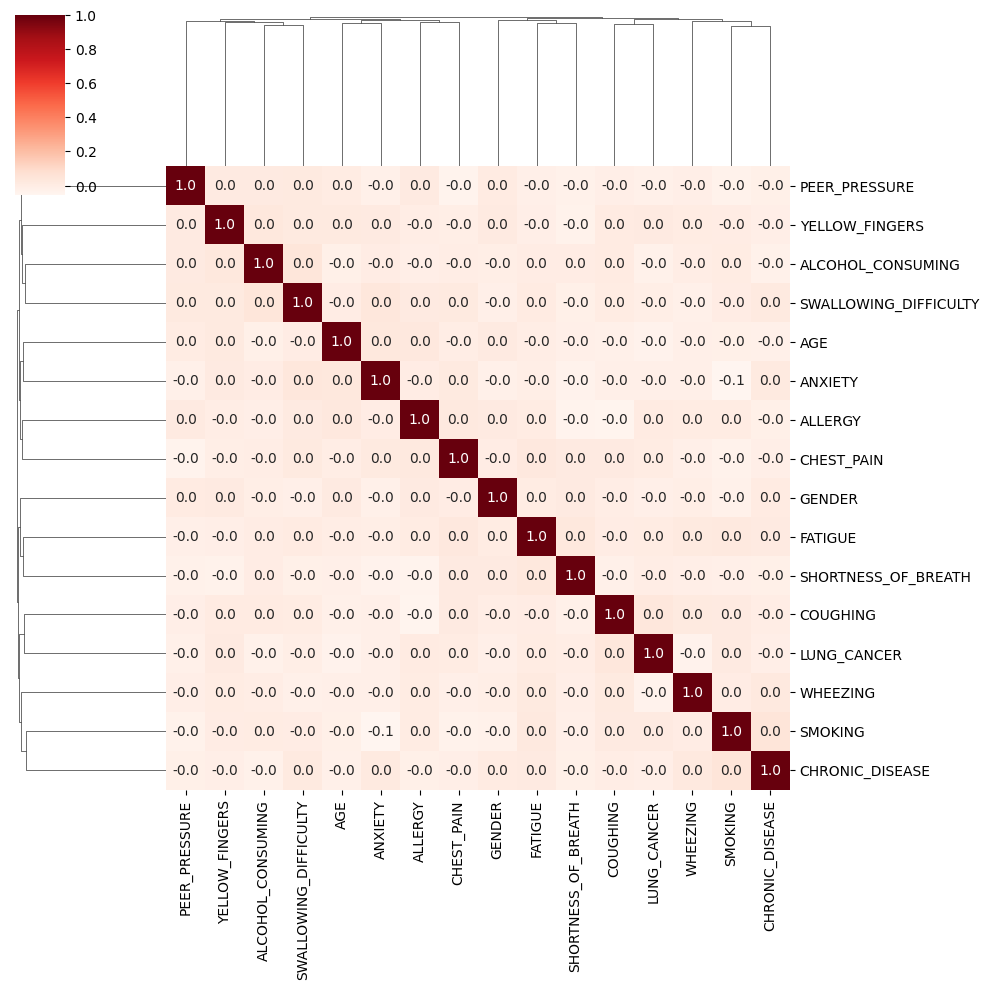

In [10]:
corr = cancer_data.corr()
plt.figure(figsize=(20, 20))
sns.clustermap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

No such correlation is observed among the features in the dataset. The only correlation can be observed is more smoking leads to a very less amount of anxity. Rest of other features are not correlated either. This could be because of the type of data or surveyors.

In [11]:
cancer_data["GENDER"] = cancer_data["GENDER"].replace({1:"Male", 0:"Female"})
cancer_data["LUNG_CANCER"] = cancer_data["LUNG_CANCER"].replace({1:"Yes", 0:"No"})
for column in cancer_data.columns:
    cancer_data[column] = cancer_data[column].replace({1: "No", 2: "Yes"})
    
cancer_data.head()

# Restoring the previous data of Categorical features.

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,Male,65,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
1,Female,55,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No
2,Female,78,Yes,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,No,Yes
3,Male,60,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Yes,Yes,Yes
4,Female,80,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,Yes,No


<Axes: xlabel='SMOKING', ylabel='count'>

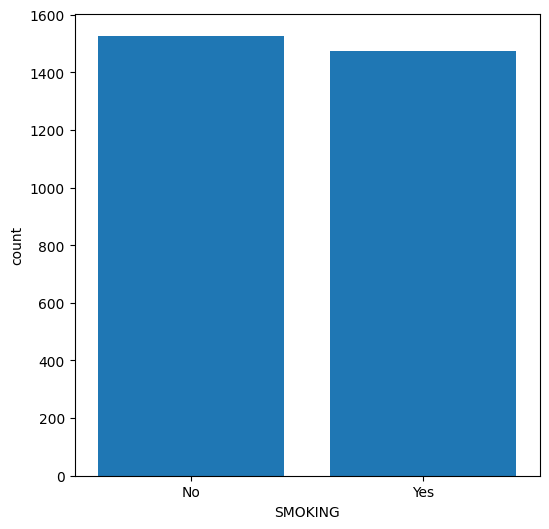

In [14]:
# Smokers count
plt.figure(figsize=(6,6))
sns.countplot(x="SMOKING", data=cancer_data, saturation=1)

<Axes: ylabel='count'>

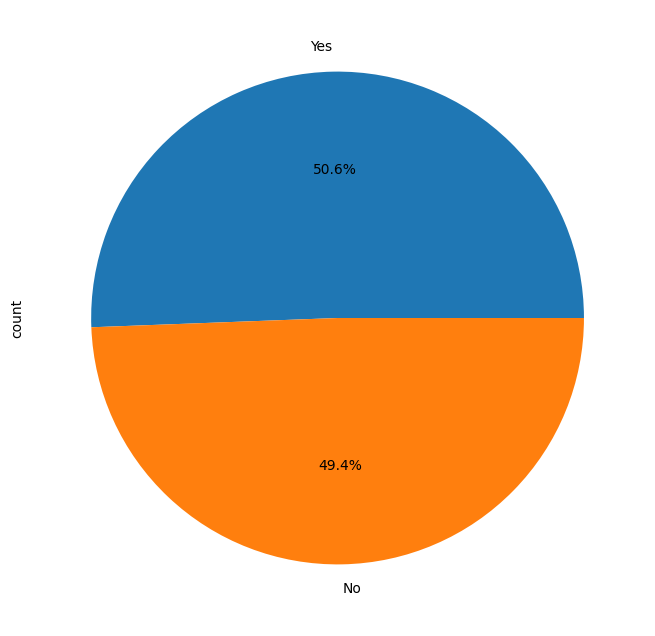

In [15]:
# Percentage of people with lung cancer in the dataset
cancer_data.LUNG_CANCER.value_counts().plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%')

50.6 % of surveyers were found having lung cancer. Rest of 49.4% were not.

<Axes: xlabel='AGE', ylabel='Count'>

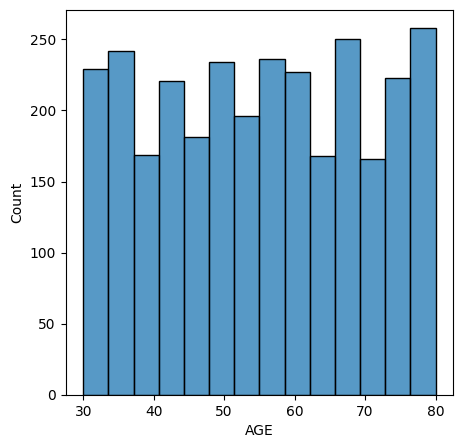

In [17]:
plt.figure(figsize = (5,5))
sns.histplot(cancer_data['AGE'])

People above 30 are having mostly lung cancer.

<Axes: xlabel='GENDER', ylabel='count'>

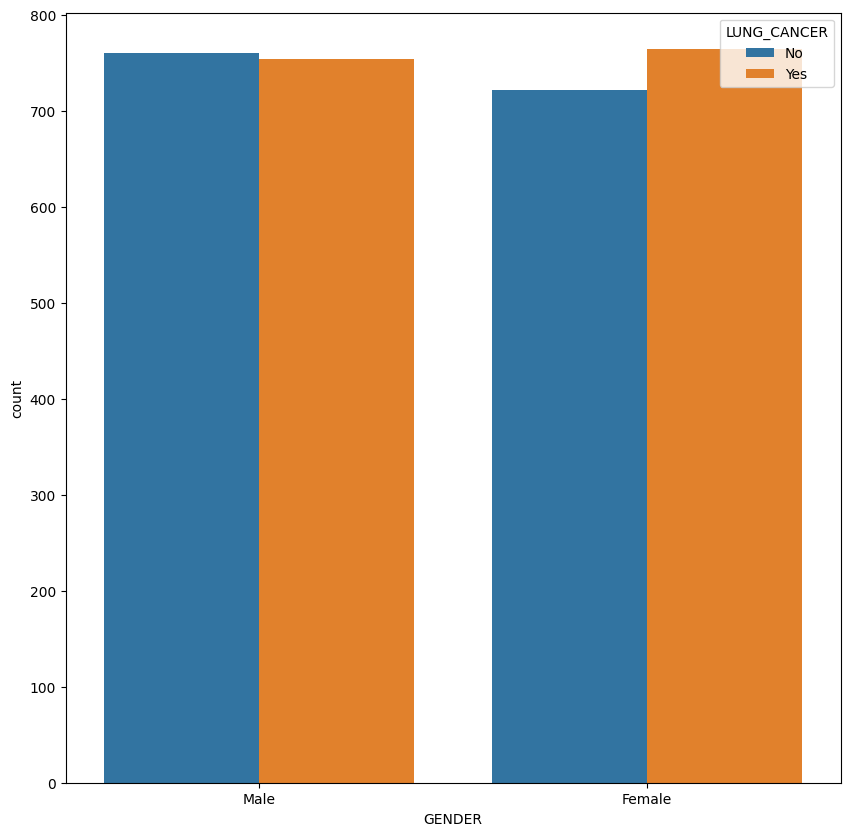

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(x="GENDER", data=cancer_data, hue= 'LUNG_CANCER')

There is no biasness between gender counts who are having cancer. But, no. of cancer affected female is slightly less than cancer free female. In case of male, no. of cancer affected and cancer free are almost same.

In [25]:
cancer_data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

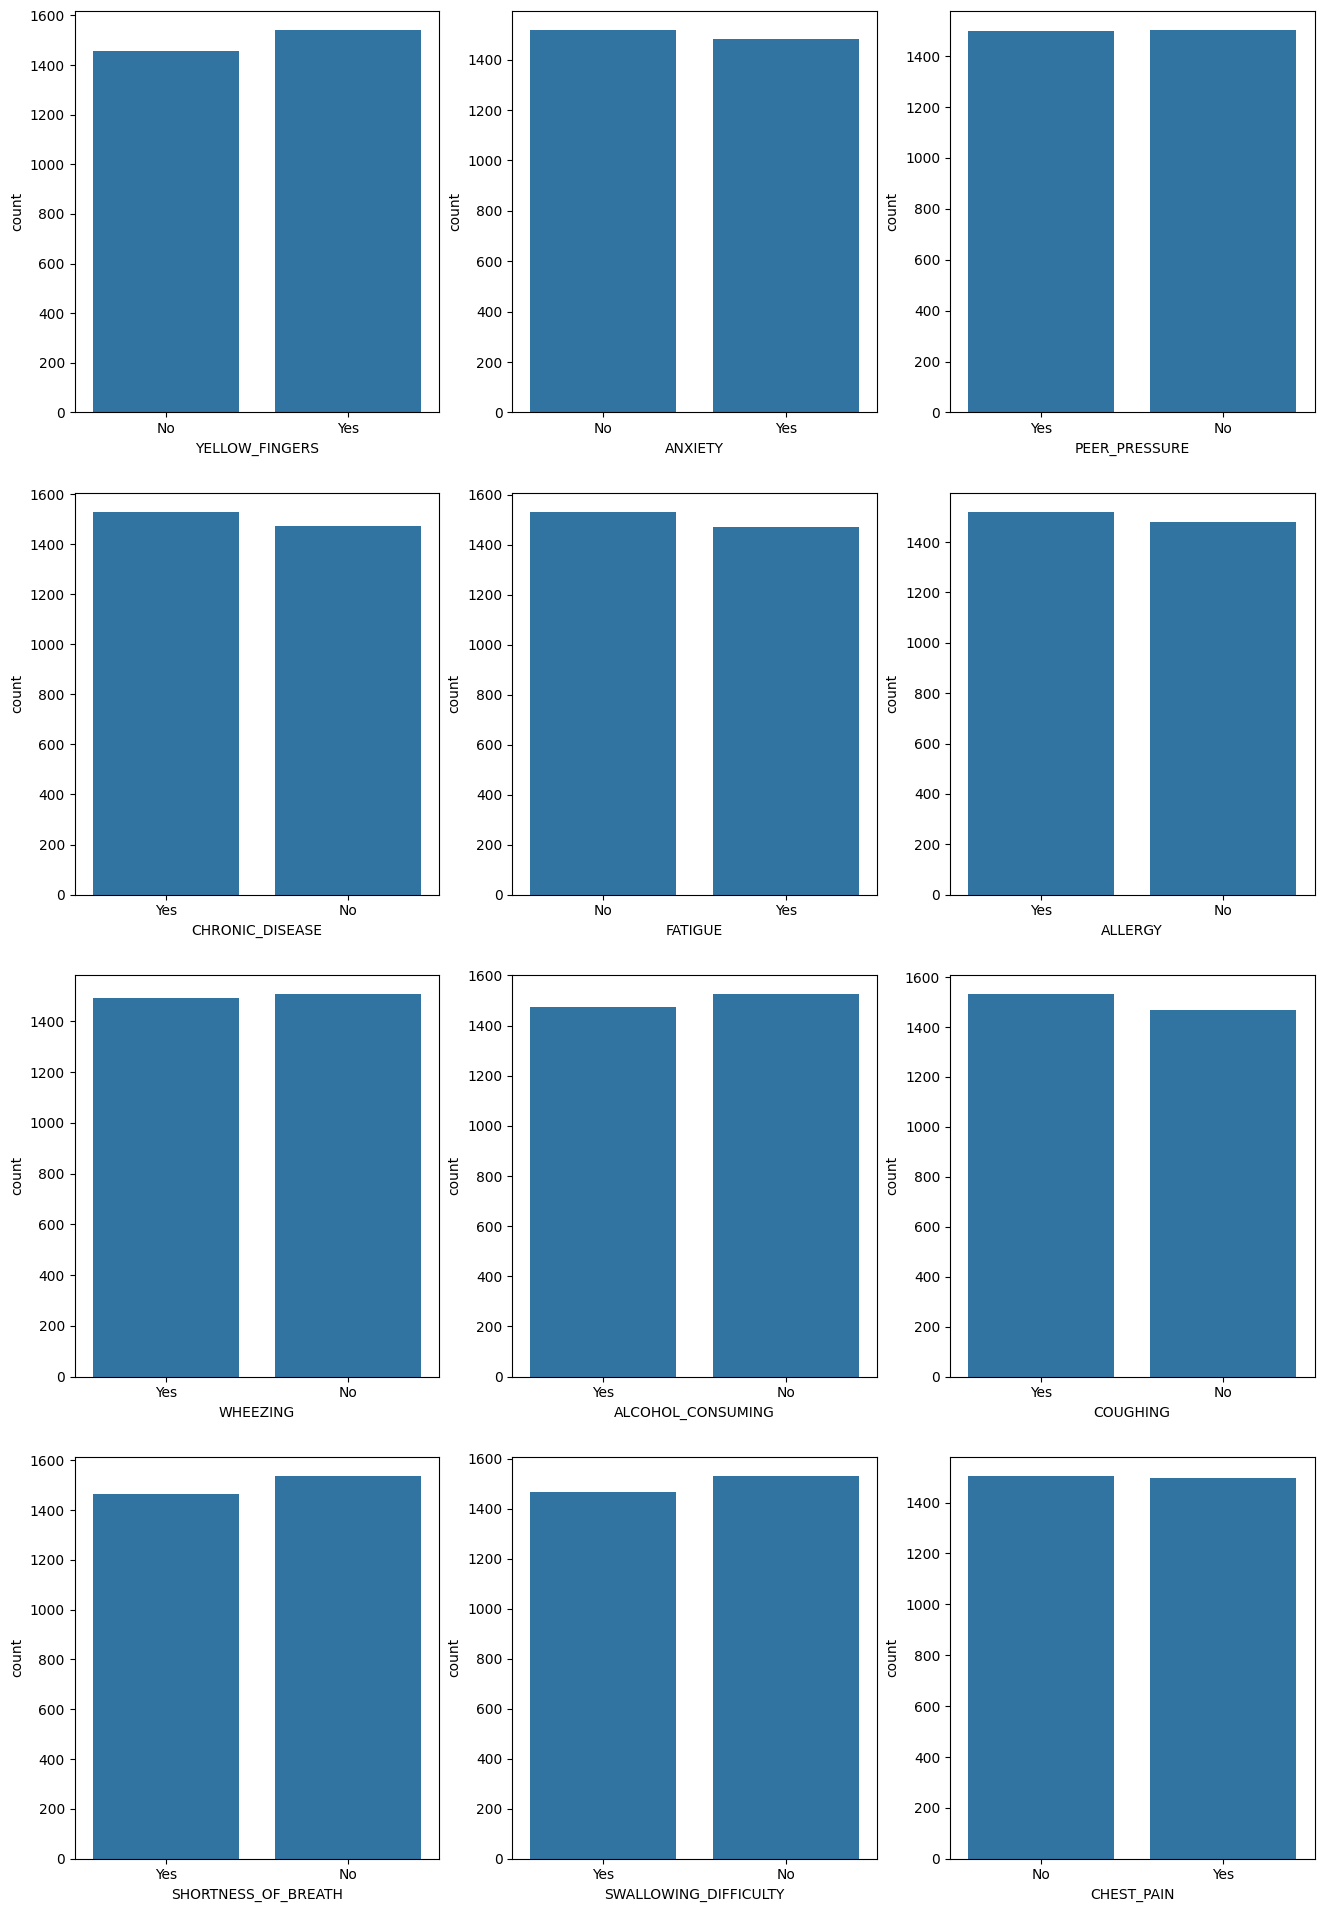

In [27]:
symptoms = ['YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
fig, ax = plt.subplots(4,3)
fig.set_size_inches(16,24)

for i in range(4):
    for j in range(3):
        sns.countplot(x = cancer_data[symptoms[3 * i + j]] , ax = ax[i][j])

After observing all plots, it is clear that the symptoms like Yellow finger, chest pain, swallowing difficulty, shortness of breath, caughnig, etc does not indicate clearly that the person has possiblith of having cancer or not.

# Conclusion
Based on the data, we've made inferences such as relationships between symptoms and the likeliness of having lung cancer and relationships with gender, age, etc.

Training a machine learning model with this dataset might not help us that much predict whether or not someone will be diagnosed with lung cancer or not as no such strong indication is observed from this data.